# Example of solving for 3x3 stationary distribution

In [50]:
P = [0.2 0.3 0.5;
     0.1 0.9 0.0
     0.2 0.4 0.4]

3×3 Matrix{Float64}:
 0.2  0.3  0.5
 0.1  0.9  0.0
 0.2  0.4  0.4

In [51]:
P*ones(3) 

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [52]:
using LinearAlgebra

Want the form $A x = b$

$$
\pi P = \pi
$$

$$
\pi P - \pi I = 0
$$

$$
\pi (P-I) = 0
$$

$$
(P^\top - I) \pi^T = 0
$$

In [53]:
rank(P'-I) 

2

In [54]:
inv(P'-I) #fake...

3×3 Matrix{Float64}:
 4.32346e15  4.32346e15  4.32346e15
 2.73819e16  2.73819e16  2.73819e16
 3.60288e15  3.60288e15  3.60288e15

One more equation (sum of probabilities is $1$):
$$
\pi {\mathbf 1} = 1
$$

$$
{\mathbf 1}^\top \pi^\top = 1
$$

In [55]:
A = P'-I
A[3,:] = ones(3) #replace last row with ones (could have done it to any row)
A

3×3 Matrix{Float64}:
 -0.8   0.1  0.2
  0.3  -0.1  0.4
  1.0   1.0  1.0

In [56]:
b = [0,0,1]

3-element Vector{Int64}:
 0
 0
 1

Now I feel the system $Ax=b$ solves for $\pi$ where $x$ is $\pi^\top$.

In [57]:
? \

search: \



```
\(x, y)
```

Left division operator: multiplication of `y` by the inverse of `x` on the left. Gives floating-point results for integer arguments.

# Examples

```jldoctest
julia> 3 \ 6
2.0

julia> inv(3) * 6
2.0

julia> A = [4 3; 2 1]; x = [5, 6];

julia> A \ x
2-element Vector{Float64}:
  6.5
 -7.0

julia> inv(A) * x
2-element Vector{Float64}:
  6.5
 -7.0
```

---

```
\(A, B)
```

Matrix division using a polyalgorithm. For input matrices `A` and `B`, the result `X` is such that `A*X == B` when `A` is square. The solver that is used depends upon the structure of `A`.  If `A` is upper or lower triangular (or diagonal), no factorization of `A` is required and the system is solved with either forward or backward substitution. For non-triangular square matrices, an LU factorization is used.

For rectangular `A` the result is the minimum-norm least squares solution computed by a pivoted QR factorization of `A` and a rank estimate of `A` based on the R factor.

When `A` is sparse, a similar polyalgorithm is used. For indefinite matrices, the `LDLt` factorization does not use pivoting during the numerical factorization and therefore the procedure can fail even for invertible matrices.

# Examples

```jldoctest
julia> A = [1 0; 1 -2]; B = [32; -4];

julia> X = A \ B
2-element Vector{Float64}:
 32.0
 18.0

julia> A * X == B
true
```

---

```
(\)(F::QRSparse, B::StridedVecOrMat)
```

Solve the least squares problem $\min\|Ax - b\|^2$ or the linear system of equations $Ax=b$ when `F` is the sparse QR factorization of $A$. A basic solution is returned when the problem is underdetermined.

# Examples

```jldoctest
julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
4×2 SparseMatrixCSC{Float64, Int64} with 3 stored entries:
 1.0   ⋅
 1.0   ⋅
  ⋅    ⋅
 1.0   ⋅

julia> qr(A)\fill(1.0, 4)
2-element Vector{Float64}:
 1.0
 0.0
```


In [58]:
A

3×3 Matrix{Float64}:
 -0.8   0.1  0.2
  0.3  -0.1  0.4
  1.0   1.0  1.0

In [59]:
b

3-element Vector{Int64}:
 0
 0
 1

In [60]:
pi

π = 3.1415926535897...

In [61]:
pi_sol = A \ b

3-element Vector{Float64}:
 0.12244897959183676
 0.7755102040816326
 0.10204081632653064

In [17]:
sum(pi_sol)

1.0

In [18]:
pi_sol'*P

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 0.122449  0.77551  0.102041

## Using matrix powers

In [66]:
P^100 #matrix power (instead of 10 should be bigger)

3×3 Matrix{Float64}:
 0.122449  0.77551  0.102041
 0.122449  0.77551  0.102041
 0.122449  0.77551  0.102041

In [70]:
pi_sol2 = (P^100)[1,:]

3-element Vector{Float64}:
 0.12244897959183747
 0.775510204081637
 0.10204081632653117

In [71]:
pi_sol

3-element Vector{Float64}:
 0.12244897959183676
 0.7755102040816326
 0.10204081632653064

In [72]:
err = norm(pi_sol - pi_sol2)

4.418915151159586e-15

# Using spectral stuff

In [22]:
eigvals(P)

3-element Vector{Float64}:
 -0.019258240356725187
  0.5192582403567251
  1.0000000000000002

In [23]:
eigvals(rand(3,3))

3-element Vector{ComplexF64}:
 0.3589951748731274 - 0.12262548089986838im
 0.3589951748731274 + 0.12262548089986838im
 1.7289015125090477 + 0.0im

Now you want to get the eigenvector associated with that "maximal eigenvalue"

In [25]:
eigvecs(P') #this gets the left eigenvectors

3×3 Matrix{Float64}:
  0.637662   0.148184  0.154662
  0.122803  -0.769456  0.979525
 -0.760465   0.621272  0.128885

In [26]:
v = eigvecs(P')[:,3]

3-element Vector{Float64}:
 0.1546617786679402
 0.9795245982302874
 0.128884815556617

In [28]:
norm(v) #L_2 norm (sqrt of sum of squares)

1.0

In [29]:
sum(v)

1.2630711924548446

In [30]:
v/sum(v)

3-element Vector{Float64}:
 0.12244897959183677
 0.7755102040816324
 0.10204081632653077

In [31]:
pi_sol

3-element Vector{Float64}:
 0.12244897959183676
 0.7755102040816326
 0.10204081632653064

# Random trajectories from a Markov Chain

In [32]:
P

3×3 Matrix{Float64}:
 0.2  0.3  0.5
 0.1  0.9  0.0
 0.2  0.4  0.4

In [33]:
state = 3 #1 or 2 or 3

3

In [34]:
using StatsBase

In [49]:
state = 3
state = sample(1:3,Weights(P[state,:])) #sample from weights according to the row of current state 
@show state
state = sample(1:3,Weights(P[state,:]))
@show state
state = sample(1:3,Weights(P[state,:]))
@show state
state = sample(1:3,Weights(P[state,:]))
@show state
state = sample(1:3,Weights(P[state,:]))
@show state
state = sample(1:3,Weights(P[state,:]))


state = 3
state = 2
state = 2
state = 2
state = 2


2

# For derivatives see book: https://mitpress.mit.edu/books/algorithms-optimization


In [77]:
array = rand(100)
findmin(array) #see argmin

(0.004599551629193899, 71)

## Ad-hoc question

In [78]:
using Plots

In [81]:
[1 2 
    3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [ ]:
plot(h_range, [errs_forward_f1 errs_central_f1 errs_complex_f1 errs_forward_f2 errs_central_f2 errs_complex_f2 
        errs_forward_f3 errs_central_f3 errs_complex_f3], 
    yaxis = :log,xaxis = :log,
    xlabel="h",ylabel="Absolute relative error",
    label = ["forward difference scheme for $f1(x) at x= $x1" "central difference scheme for $f1(x) at x= $x1" "complex difference scheme for $f1(x) at x= $x1" 
            "forward difference scheme for $f2(x) at x= $x2" "central difference scheme for $f2(x) at x= $x2" "complex difference scheme for $f2(x) at x= $x2" 
            "forward difference scheme for $f3(x) at x= $x3" "central difference scheme for $f3(x) at x= $x3" "complex difference scheme for $f3(x) at x= $x3"], 
            c = [:red :red2 :red3 :blue :blue2 :blue3 :green :green2 :green3], legend = :bottomright)

In [87]:
using Random;Random.seed!(0)
data1 = rand(20)
data2 = rand(20)
data3 = rand(20);

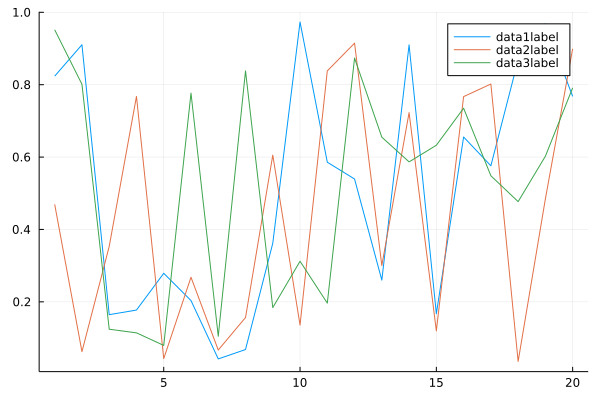

In [88]:
plot(1:20, [data1 data2 data3], label=["data1label" "data2label" "data3label"])

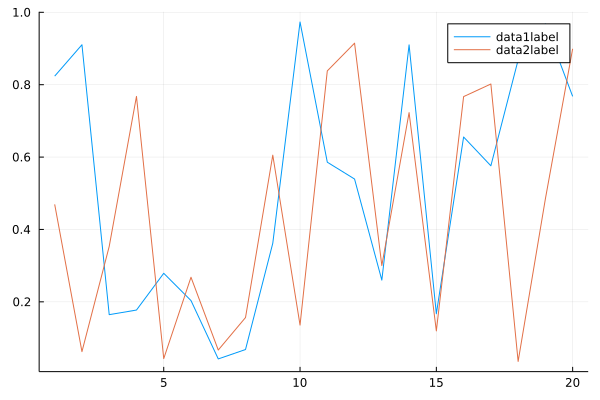

In [90]:
plot(1:20,data1,label="data1label")
plot!(1:20,data2,label="data2label")  #notice the !

# https://statisticswithjulia.org/gallery.html

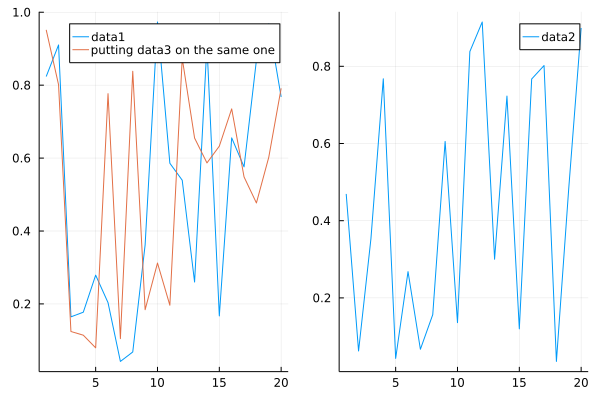

In [99]:
p1 = plot(1:20,data1,label="data1")
     plot!(1:20,data3,label="putting data3 on the same one")
p2 = plot(1:20,data2,label="data2")
plot(p1,p2,size=(600,400))